In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
adult_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\Titanic\depy2016-master\depy2016-master\adult.csv'

adult = pd.read_csv(adult_path)
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
age               5000 non-null object
workclass         5000 non-null object
fnlwgt            5000 non-null object
education         5000 non-null object
education_num     5000 non-null object
marital_status    5000 non-null object
occupation        5000 non-null object
relationship      5000 non-null object
race              5000 non-null object
sex               5000 non-null object
capital_gain      5000 non-null int64
capital_loss      5000 non-null int64
hours_per_week    5000 non-null int64
native_country    5000 non-null object
income            5000 non-null object
dtypes: int64(3), object(12)
memory usage: 586.0+ KB


In [5]:
adult.sex.unique() #prinitng all categories for categoriacal data in column

array(['Male', '#NAME?', 'Female'], dtype=object)

In [6]:
for column in adult.columns:
    if adult[column].dtypes == 'object': #finding all unique categories
        unique_cat = len(adult[column].unique())
        print("Feature {} has {} unique categories".format(column, unique_cat))

Feature age has 69 unique categories
Feature workclass has 8 unique categories
Feature fnlwgt has 4507 unique categories
Feature education has 17 unique categories
Feature education_num has 17 unique categories
Feature marital_status has 7 unique categories
Feature occupation has 15 unique categories
Feature relationship has 6 unique categories
Feature race has 6 unique categories
Feature sex has 3 unique categories
Feature native_country has 40 unique categories
Feature income has 2 unique categories


In [7]:
adult.native_country.value_counts() #can we only save USA, Maxico and call the rest as 'Others' ?

United-States                 4465
Mexico                         104
?                               97
Canada                          28
Germany                         22
Philippines                     22
El-Salvador                     16
England                         16
Puerto-Rico                     16
China                           15
Jamaica                         15
Cuba                            14
Dominican-Republic              13
India                           12
Italy                           12
Iran                            11
Vietnam                         10
Guatemala                       10
Taiwan                          10
South                            9
Japan                            9
Poland                           9
Portugal                         7
Haiti                            6
Greece                           6
Columbia                         5
Nicaragua                        5
Trinadad&Tobago                  4
Ecuador             

In [8]:
adult.race.value_counts() #we can merge #NAME ? with Other

White                 4021
Black                  493
#NAME?                 264
Asian-Pac-Islander     145
Amer-Indian-Eskimo      48
Other                   29
Name: race, dtype: int64

In [9]:
adult.relationship.value_counts() # lets merge Other-relative and unmarried with Not-in-family

Husband           2001
Not-in-family     1292
Own-child          770
Unmarried          544
Wife               245
Other-relative     148
Name: relationship, dtype: int64

In [10]:
adult.workclass.value_counts()

Private             3435
Self-emp-not-inc     383
?                    331
Local-gov            329
State-gov            193
Self-emp-inc         182
Federal-gov          146
Without-pay            1
Name: workclass, dtype: int64

In [11]:
adult.occupation.value_counts()

Prof-specialty       625
Craft-repair         619
Exec-managerial      618
Sales                588
Adm-clerical         576
Other-service        495
?                    331
Machine-op-inspct    312
Transport-moving     247
Handlers-cleaners    196
Farming-fishing      143
Tech-support         140
Protective-serv       90
Priv-house-serv       18
Armed-Forces           2
Name: occupation, dtype: int64

In [12]:
adult.age.value_counts() #looking for strange values in data - ex. #NAME?

31        159
34        139
23        135
25        135
35        135
30        135
41        134
37        130
20        128
46        126
40        126
43        125
28        124
29        124
27        122
47        122
26        121
32        120
36        119
24        118
22        117
38        117
44        115
33        115
39        114
45        111
42        111
19        109
51         99
21         98
         ... 
57         55
59         54
56         52
58         49
61         48
#NAME?     48
63         42
60         41
64         36
65         29
62         27
66         23
67         20
68         18
72         12
75         12
69         12
71         10
74         10
70         10
76          9
90          7
73          7
77          5
81          4
80          3
79          3
78          2
82          1
88          1
Name: age, Length: 69, dtype: int64

In [13]:
adult.education_num.value_counts()

9         1597
10        1114
13         819
14         251
11         215
7          198
12         163
6          144
4           98
15          88
5           74
#NAME?      57
8           55
16          55
3           43
2           22
1            7
Name: education_num, dtype: int64

In [14]:
adult.fnlwgt.value_counts().head()

#NAME?    107
123983      5
94235       4
117963      4
111567      4
163003      4
155343      4
190290      3
188386      3
195124      3
194636      3
204205      3
216129      3
286750      3
134768      3
182556      3
171114      3
127651      3
64292       3
111900      3
120939      3
35633       3
154374      3
159732      3
356838      3
164190      3
208358      3
200973      3
125417      3
185041      3
         ... 
319149      1
113601      1
680390      1
153405      1
255364      1
180980      1
101752      1
354591      1
147328      1
21174       1
187666      1
315128      1
83444       1
167501      1
302465      1
172987      1
217083      1
50282       1
170230      1
69209       1
43554       1
176317      1
303990      1
526968      1
298332      1
24185       1
92003       1
367237      1
291175      1
185749      1
Name: fnlwgt, Length: 4507, dtype: int64

## Data preprocessing

In [15]:
adult_copy = adult.copy() #making copy of the dataset

adult_copy['income'] = [0 if x=='<=50K' else 1 for x in adult_copy['income']] #changing <=50K to binary reprezentation

adult_copy['income'].value_counts()

0    3779
1    1221
Name: income, dtype: int64

In [16]:
X = adult_copy.drop('income', axis = 1) #creaitng X and y - we want to predict income
y = adult_copy.income

In [17]:
for i in range(len(X['native_country'])): #leaving only Mexico and US, creating Others
    if X.loc[i, ['native_country']].item()!='United-States' and X.loc[i, ['native_country']].item()!='Mexico':
        X.loc[i, ['native_country']] = 'Other'
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other


In [18]:
 X.native_country.unique()  #leaving only Mexico and US, creating Others

array(['United-States', 'Other', 'Mexico'], dtype=object)

In [19]:
for i in range(len(X['race'])): #changing #NAME? to Other
    if X.loc[i, ['race']].item()=='#NAME?':
        X.loc[i, ['race']] = 'Other'
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other


In [20]:
X.race.value_counts()

White                 4021
Black                  493
Other                  293
Asian-Pac-Islander     145
Amer-Indian-Eskimo      48
Name: race, dtype: int64

In [21]:
for i in range(len(X['relationship'])): #merging other-relative and unmarried with not-in-family
    if X.loc[i, ['relationship']].item()=='Other-relative' or X.loc[i, ['relationship']].item()=='Unmarried':
        X.loc[i, ['relationship']] = 'Not-in-family'

In [22]:
X.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child'], dtype=object)

In [23]:
for i in range(len(X['workclass'])): #merging other-relative and unmarried with not-in-family
    if X.loc[i, ['workclass']].item()=='Local-gov' or X.loc[i, ['workclass']].item()=='State-gov':
        X.loc[i, ['workclass']] = 'Federal-gov'
    if X.loc[i, ['workclass']].item()=='Without-pay' or X.loc[i, ['workclass']].item()=='?' :
        X.loc[i, ['workclass']] = 'Others'

In [24]:
X.workclass.unique()

array(['Federal-gov', 'Self-emp-not-inc', 'Private', 'Others',
       'Self-emp-inc'], dtype=object)

In [25]:
def fill_name(column):
    sumator=0
    numbers=0
    for i in range(len(X[column])): #merging other-relative and unmarried with not-in-family
        if X.loc[i, [column]].item()!='#NAME?':
            sumator+=int(X.loc[i, [column]].item())
            numbers+=1
    mean = int(sumator/numbers)
    for i in range(len(X[column])):
        if X.loc[i,[column]].item()=='#NAME?':
            X.loc[i,[column]] = mean
    return X

In [26]:
X = fill_name('age')
X.age.unique()

array(['39', '50', '38', '53', '28', '37', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', 38, '43', '54', '35', '59', '56', '19',
       '20', '45', '22', '48', '21', '24', '25', '57', '44', '41', '29',
       '18', '47', '46', '36', '79', '27', '67', '33', '76', '17', '55',
       '61', '70', '64', '71', '68', '66', '51', '58', '26', '60', '90',
       '75', '65', '77', '62', '63', '80', '72', '74', '69', '73', '81',
       '78', '88', '82'], dtype=object)

In [27]:
X = fill_name('education_num')
X.education_num.unique()

array(['13', '9', '7', '14', '5', '10', '12', '11', '4', '16', 10, '15',
       '3', '6', '2', '1', '8'], dtype=object)

In [28]:
X = fill_name('fnlwgt')
X.fnlwgt.unique()

array(['77516', '83311', '215646', ..., '212120', '245880', '54947'],
      dtype=object)

In [29]:
X = fill_name('hours_per_week')
X.hours_per_week.unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77], dtype=int64)

In [30]:
X = fill_name('capital_gain')
X.capital_gain.unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346], dtype=int64)

In [31]:
X = fill_name('capital_loss')
X.capital_loss.unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594],
      dtype=int64)

### Data preprocessing vol.2

In [32]:
X2 = adult.copy()
y2 = X2['income']
X2 = X2.drop('income', axis=1)

In [33]:
y2 = pd.Series([0 if i=="<=50K" else 1 for i in y2]) #preparing y

In [34]:
y2.value_counts()

0    3779
1    1221
dtype: int64

In [35]:
X2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [36]:
for f in list(X2.columns):
    for i in range(len(X2[f])):
        if X2.loc[i, [f]].item()=='#NAME?': #replacing #NAME? with NaN
            X2.loc[i,[f]] = np.nan

In [37]:
X2.education_num.value_counts().sum() #how many good data of 5000  - 57 isnull

4943

In [38]:
print(X2.age.isnull().sum()) #isnull
print(X2.age.value_counts().sum()) #rest of the values

48
4952


In [39]:
from sklearn.preprocessing import Imputer

In [40]:
values = X2.values
print(type(values))
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #replacing nan with mean - simple approach
imp.fit(values[:,[0,2,4,10,11,12]]) #selecting only numeric values
values[:,[0,2,4,10,11,12]] = imp.fit_transform(values[:,[0,2,4,10,11,12]])

df1 = pd.DataFrame(values)
df1.isnull().sum()

<class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8     264
9      47
10      0
11      0
12      0
13      0
dtype: int64

In [41]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #replacing nan with mean - simple approach
imp.fit(values[:,[0,2,4,10,11,12]]) #selecting only numeric values
values[:,[0,2,4,10,11,12]] = imp.fit_transform(values[:,[0,2,4,10,11,12]])

df1 = pd.DataFrame(values)
df1.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8     264
9      47
10      0
11      0
12      0
13      0
dtype: int64

In [42]:
for x_column,new_column in zip(list(X2.columns), list(df1.columns)): #renaming new df, with no NaN in numeric columns
    df1.rename(columns={new_column:x_column}, inplace=True)
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [43]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Now we just need to get rid of NaN-s in categorical data

In [45]:
print(df1.age.isnull().sum())
print(df1.education_num.isnull().sum())
print(df1.capital_gain.isnull().sum())
print(df1.capital_loss.isnull().sum())
print(df1.hours_per_week.isnull().sum())
#no nulls in numerical columns

0
0
0
0
0


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
age               5000 non-null object
workclass         5000 non-null object
fnlwgt            5000 non-null object
education         5000 non-null object
education_num     5000 non-null object
marital_status    5000 non-null object
occupation        5000 non-null object
relationship      5000 non-null object
race              4736 non-null object
sex               4953 non-null object
capital_gain      5000 non-null object
capital_loss      5000 non-null object
hours_per_week    5000 non-null object
native_country    5000 non-null object
dtypes: object(14)
memory usage: 547.0+ KB


## Outlier detection - Tukey IQR

In [46]:
 def find_outliers_tuker(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1-1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor) | (x>ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [47]:
tukey_indices, tukey_values = find_outliers_tuker(df1['age'])
print(np.sort(tukey_values))

[76. 76. 76. 76. 76. 76. 76. 76. 76. 77. 77. 77. 77. 77. 78. 78. 79. 79.
 79. 80. 80. 80. 81. 81. 81. 81. 82. 88. 90. 90. 90. 90. 90. 90. 90.]


## Outlier Detection - Kernel Density Estimation

In [48]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

In [49]:
def find_outliers_kde(x):
    x_scaled = scale(list(map(float,x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott', fft=True)
    pred = kde.evaluate(x_scaled)
    
    n=sum(pred<0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value


In [50]:
kde_indices, kde_values = find_outliers_kde(df1['age'])
print(kde_values)

[88.0 90.0 90.0 90.0 90.0 90.0 90.0 90.0 82.0 81.0 81.0 81.0 81.0 80.0
 80.0 80.0 79.0 79.0 79.0 78.0 78.0 77.0 77.0 77.0 77.0 77.0 76.0 76.0
 76.0 76.0 76.0 76.0 76.0 76.0 76.0 75.0 75.0 75.0 75.0 75.0 75.0 75.0
 75.0 75.0 75.0 75.0 75.0 74.0 74.0 74.0 74.0 74.0 74.0 74.0 74.0 74.0
 74.0 73.0 73.0 73.0 73.0 73.0 73.0 73.0 72.0 72.0 72.0 72.0 72.0 72.0
 72.0 72.0 72.0 72.0 72.0 72.0 71.0 71.0 71.0 71.0 71.0 71.0 71.0 71.0
 71.0 71.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 69.0 69.0
 69.0 69.0 69.0 69.0 69.0 69.0 69.0 69.0 69.0 69.0 68.0 68.0 68.0 68.0
 68.0 68.0 68.0 68.0 68.0 68.0 68.0 68.0 68.0 68.0 68.0 68.0 68.0 68.0]


# Distribution of Features

In [51]:
def plot_histogram(x,y):
    plt.hist(list(x[y==0]), label='DV=0', alpha=0.5)
    plt.hist(list(x[y==1]), label='Dv=1', alpha=0.5)
    plt.title('Histogram of {}'.format(x.name))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

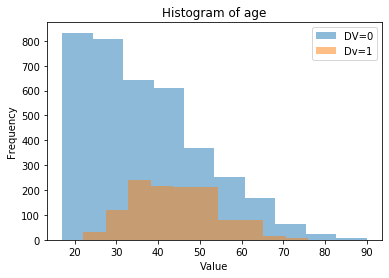

In [52]:
plot_histogram(df1['age'], y2)

# Interactions 

# Dimensionaly reduction using PCA

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X2))

ValueError: could not convert string to float: 'State-gov'

## Model building

In [142]:
def dummy_generator(df, features):
    for x in features:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies], axis=1)
    return df

In [143]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [144]:
features_to_dummy = ['workclass', 'education','marital_status','occupation','relationship','race','sex','native_country']
X = dummy_generator(X, features_to_dummy)
X.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Federal-gov', 'workclass_Others',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_?',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupat

In [145]:
from sklearn.dummy import DummyClassifier

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.33)

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
prediction = model.predict(X_test)


0.8290909090909091


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [148]:
y.sum() #numer of 1 in y

1221

In [149]:
count_good=0
print(len(y_test))
for i in y_test:
    if i==0:
        count_good+=1
print('Result', count_good/len(y_test))


1650
Result 0.7339393939393939


In [150]:
dummy_model = DummyClassifier(strategy='most_frequent') #dummy classifier uses by default different strategy
dummy_model.fit(X_train, y_train)
dummy_model.score(X_test, y_test)

0.7339393939393939

In [152]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [155]:
confusion_matrix(y_test, prediction)

array([[1131,   80],
       [ 202,  237]], dtype=int64)

In [156]:
auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, treshhold = roc_curve(y_test, model.predict_proba(X_test)[:,1])

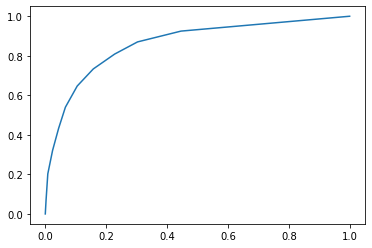

In [157]:
sns.lineplot(x=fpr, y=tpr)